In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Data Preprocessing**
1. Load the dataset
2. handel missing values
3. spliting the dataset (70% training, 30% testing)
4. Normalization 
5. EDA
6. visualizations

In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map target values to class names (optional for readability)
df['target'] = df['target'].map(dict(zip(range(3), iris.target_names)))

# Show basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:

print(df.head())# Check for missing values

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Check for missing values
print(df.isnull().sum())



sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
X = df.drop('target', axis=1) # Features
y = df['target']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [6]:
# normalizing the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


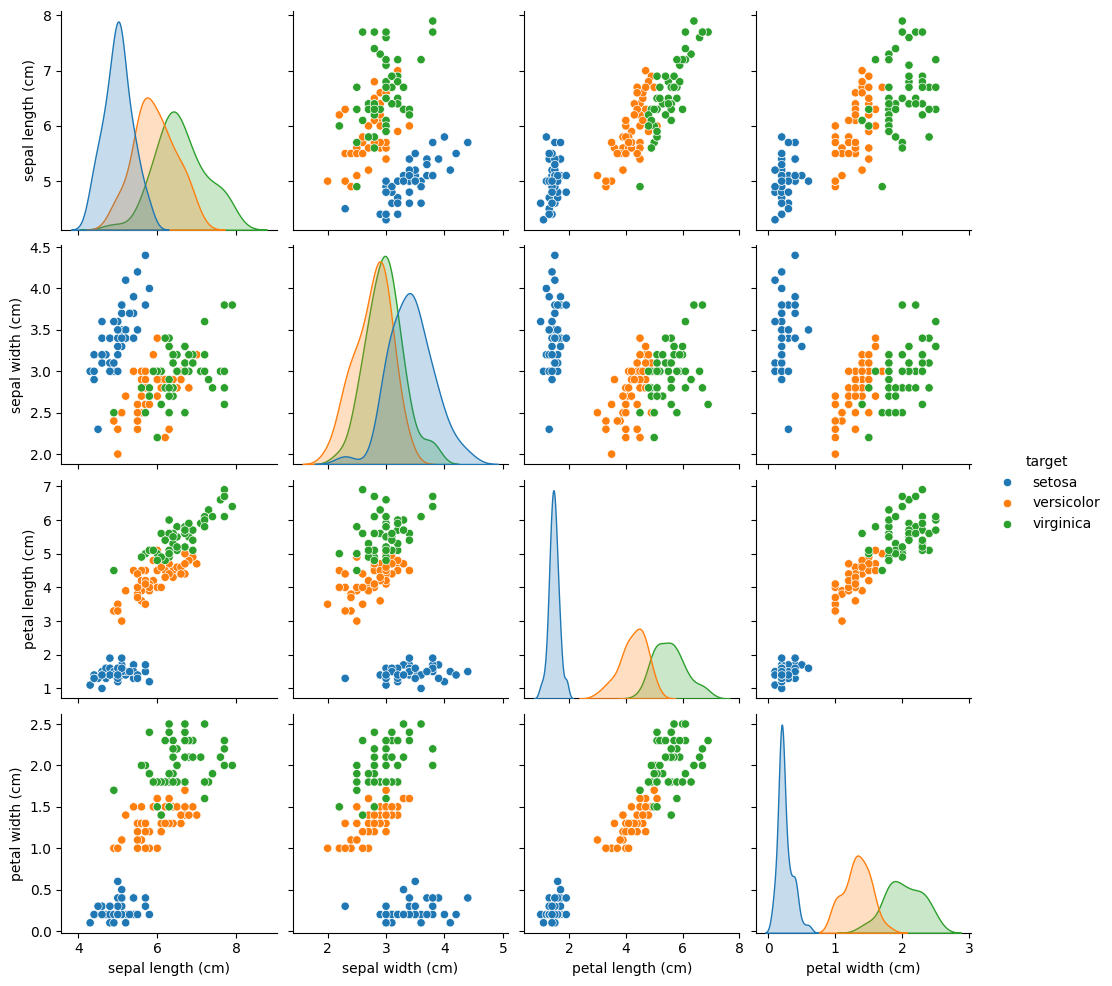

In [7]:
# Pairplot
sns.pairplot(df, hue='target')
plt.show()


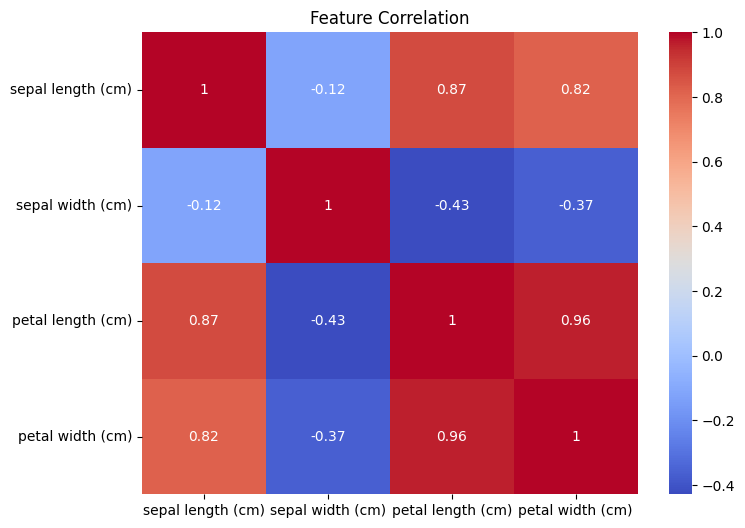

In [8]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# **SVM**
1. Implement a Support Vector Machine using sklearn
2. experimenting with different SVM kernels (linear, polynomial,RBF)
3. model training 
4. predect on test data
5. evluation
6. confusion matrix


In [10]:
#encoding from strings to integers 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded  = le.transform(y_test)


--- Grid Search for Kernel: linear ---
Best Parameters: {'C': 0.1}
Training Accuracy: 0.9810
Test Accuracy: 0.9111
Confusion Matrix (Test):
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Classification Report (Test):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



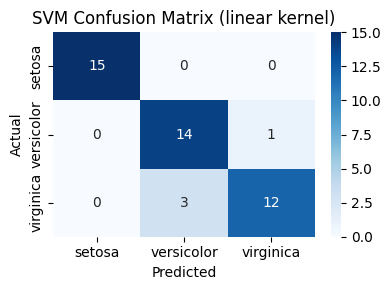


--- Grid Search for Kernel: poly ---
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale'}
Training Accuracy: 0.9905
Test Accuracy: 0.9111
Confusion Matrix (Test):
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Classification Report (Test):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



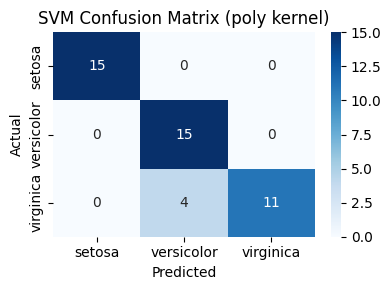


--- Grid Search for Kernel: rbf ---
Best Parameters: {'C': 1, 'gamma': 'scale'}
Training Accuracy: 0.9714
Test Accuracy: 0.9333
Confusion Matrix (Test):
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Classification Report (Test):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



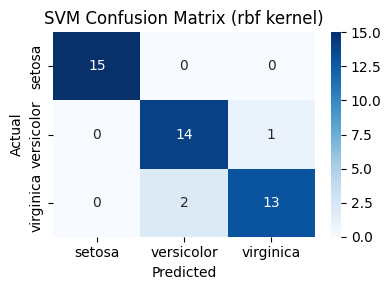

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize kernels and parameter grid
kernels = ['linear', 'poly', 'rbf']
param_grid = {
    'linear': {'C': [0.1, 1, 10]},
    'poly': {'C': [0.1, 1, 10], 'degree': [2, 3], 'gamma': ['scale', 'auto']},
    'rbf': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
}

best_params = {}
results = {}

for kernel in kernels:
    print(f"\n Grid Search for Kernel: {kernel}")
    svm = SVC(kernel=kernel)
    
    # Perform Grid Search
    clf = GridSearchCV(svm, param_grid[kernel], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train_encoded)
    
    # Get best parameters
    best_params[kernel] = clf.best_params_
    print(f"Best Parameters: {best_params[kernel]}")

    # Train model using best parameters
    best_svm = SVC(kernel=kernel, **best_params[kernel])
    best_svm.fit(X_train, y_train_encoded)
    
    # Predict on training and testing data
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)
    
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)
    
    # Evaluation results
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    cm = confusion_matrix(y_test_encoded, y_test_pred)
    print("Confusion Matrix (Test):")
    print(cm)
    print("Classification Report (Test):")
    print(classification_report(y_test_encoded, y_test_pred, target_names=le.classes_))
    
    # Store results
    results[kernel] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'best_params': best_params[kernel],
        'confusion_matrix': cm
    }

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f"SVM Confusion Matrix ({kernel} kernel)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [ ]:
print("\nSummary of All Kernels")
summary_df = pd.DataFrame({
    'Kernel': list(results.keys()),
    'Train Accuracy': [results[k]['train_accuracy'] for k in kernels],
    'Test Accuracy': [results[k]['test_accuracy'] for k in kernels],
    'Best Parameters': [results[k]['best_params'] for k in kernels]
})
print(summary_df)



--- Summary of All Kernels ---
   Kernel  Train Accuracy  Test Accuracy  \
0  linear        0.980952       0.911111   
1    poly        0.990476       0.911111   
2     rbf        0.971429       0.933333   

                            Best Parameters  
0                                {'C': 0.1}  
1  {'C': 10, 'degree': 3, 'gamma': 'scale'}  
2                {'C': 1, 'gamma': 'scale'}  


In [13]:
import numpy as np
number_of_features = X_train.shape[1]  #where shape[0] means the number of samples 
number_of_classes = len(set(y))
print(f'number of features :{number_of_features}')
print(f'number of classes :{number_of_classes}')

number of features :4
number of classes :3


**encoding the target column to one hot to be easier for keras to deal with**

In [15]:
#converting into one hot 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_encoded, num_classes=number_of_classes )
y_test = to_categorical(y_test_encoded, num_classes=number_of_classes )

# **Note**
the last y we will work on is y_train and y_test

# **Neural Networks phase**

In [16]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 


1. define model 
we have number of features = 4 sl , sw , pl , pw 
we can define them as  input_shape=[4] list for simplicity , or , input_dim = (4)

In [17]:
model = Sequential([
   Dense (64, input_shape=[4] , activation='relu') , 
   Dense (32  , activation='relu') , # we tried first with simple number of units=  24 , 12 and acc = 69%
   #then we wanted to improve the acc and reducing the loss so we made the model more complex 
   # so we added another hidden layer and units = 64 , 32 the acc = 86% then we added more layers and units to improve the acc
   #but the acc reduced so our data needs less complexity 
   #Dense (16  , activation='relu') ,  
   Dense (3,  activation='softmax')  
])

#we will try to use early stopping to prevent over fitting 
# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2. compile model 

In [18]:
model.compile(optimizer = 'adam' , loss='categorical_crossentropy' , metrics = ['accuracy'] )
epochs = 50#making it in a variable because i will use it latter in visualizing 
history = model.fit( X_train ,y_train  , validation_split=0.2, batch_size = 12
                     , epochs= epochs , verbose = 1,
                     callbacks =[early_stop])
#we played also in the number of epochs and the batch size so we tried at first the number of epochs = 10 
#and the batch size  = 64 the acc = 85 % at max 
#we reduced the batch size into 12 only and increased the number of epochs to 50 
# and the acc improved to 98% (maybe it overfits so we will tets it to know and tune)
#after evaluating we found the trainig acc = 98% and the testing is 91 % abit overfitting 
# since we said previously we will use early stopping so we will increase the number of epochs 


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3280 - loss: 1.0703 - val_accuracy: 0.2381 - val_loss: 0.9968
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3266 - loss: 0.9419 - val_accuracy: 0.4762 - val_loss: 0.8949
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7014 - loss: 0.7725 - val_accuracy: 0.6667 - val_loss: 0.8098
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6913 - loss: 0.7218 - val_accuracy: 0.6667 - val_loss: 0.7403
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8143 - loss: 0.6103 - val_accuracy: 0.7619 - val_loss: 0.6794
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8225 - loss: 0.5459 - val_accuracy: 0.8095 - val_loss: 0.6220
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8630 - loss: 0.4864 - val_accuracy: 0.8095 - val_loss: 0.5697
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8445 - loss: 0.4656 - val_accuracy: 0.8095 - val_loss: 0.5214
Epoch

# **our Notes**
when we used early stopping we added get best weights = True and that exactly what happed until we get the best weights before the model over fits 

**Evaluating and see if the model overfits or not**

In [19]:
test_loss , test_acc= model.evaluate(X_test , y_test)
print(f'the test accuracy :{test_acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9199 - loss: 0.1271 
the test accuracy :91.11%


**Make predictions**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels (reverse one-hot encoding)
y_true = np.argmax(y_test, axis=1)

# Get predicted labels for test set
y_pred = np.argmax(model.predict(X_test), axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


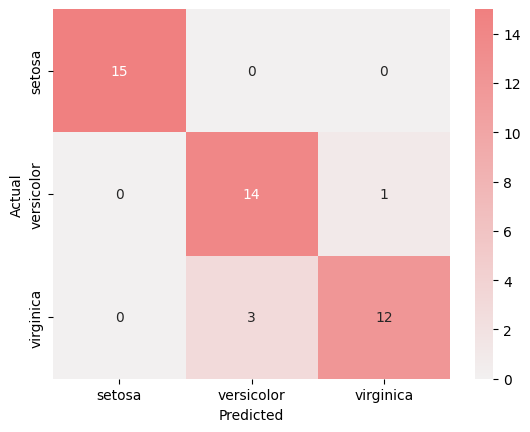

In [23]:
rose_palette = sns.light_palette("lightcoral", as_cmap=True)
cm = confusion_matrix(y_true , y_pred)
sns.heatmap(cm  ,annot=True , cmap=rose_palette , xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual') #actual 
plt.xlabel('Predicted')#predicted
plt.show()

**Plotting the validation and test loss**

In [24]:
train_loss= history.history['loss']
val_loss= history.history['val_loss']

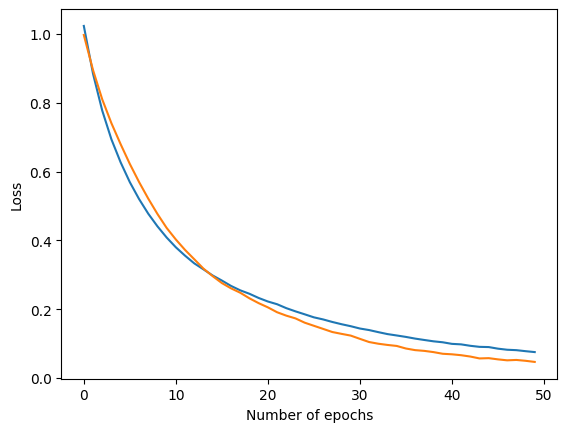

In [25]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
#create separate ROC (Receiver Operating Characteristic) plots for each class (Setosa, Versicolor, Virginica) and explain the true positive rate (TPR) and false positive rate (FPR)

from sklearn.metrics import roc_curve, auc


svm = SVC(kernel='rbf', gamma='auto', probability=True)
svm.fit(X_train, y_train_encoded)  # Use encoded labels for SVM and one hot encoding for 
svm_prob = svm.predict_proba(X_test)

nn_prob = model.predict(X_test)

# True labels (reverse one-hot encoding)
y_true = np.argmax(y_test, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


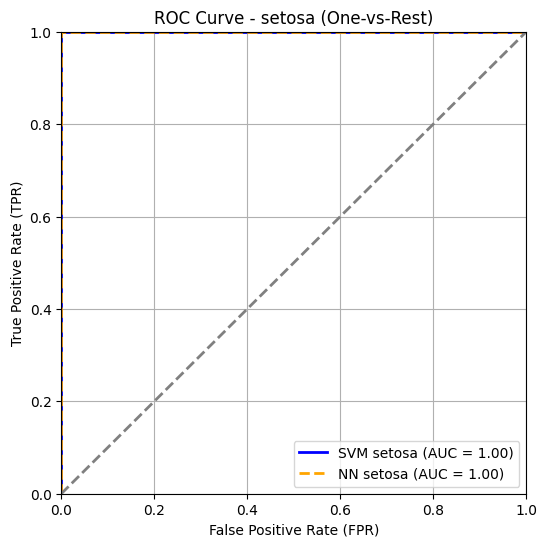

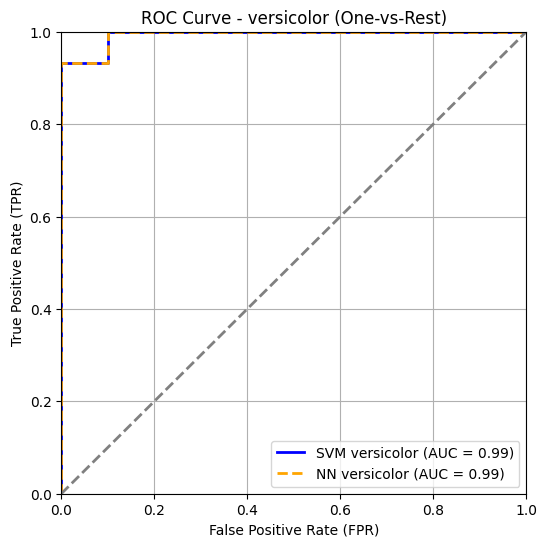

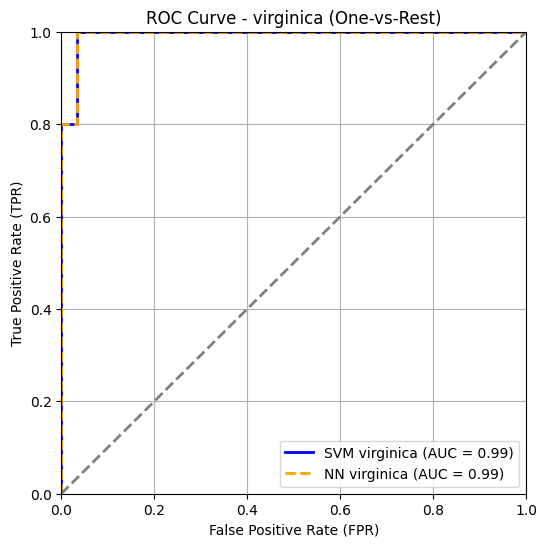

In [27]:

# Create separate plots for each class
classes = ['setosa', 'versicolor', 'virginica']
for i, class_name in enumerate(classes):
    plt.figure(figsize=(6, 6))
    
    # SVM ROC
    fpr_svm, tpr_svm, _ = roc_curve(y_test[:, i], svm_prob[:, i])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM {class_name} (AUC = {roc_auc_svm:.2f})')
    
    # NN ROC
    fpr_nn, tpr_nn, _ = roc_curve(y_test[:, i], nn_prob[:, i])
    roc_auc_nn = auc(fpr_nn, tpr_nn)
    plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, linestyle='--', label=f'NN {class_name} (AUC = {roc_auc_nn:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {class_name} (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()